
# CNN for ASL Alphabet Classification

This notebook implements a Convolutional Neural Network (CNN) to classify American Sign Language (ASL) letters using the Sign Language MNIST dataset.

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


### Load and Prepare the Data
We'll load the Sign Language MNIST dataset.

In [ ]:

# Load CSVs - update path as needed
train_df = pd.read_csv('/content/sign_mnist_train.csv')
test_df = pd.read_csv('/content/sign_mnist_test.csv')

# Separate labels and features
X_train = train_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(train_df['label'])

X_test = test_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_test = to_categorical(test_df['label'])

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


###  CNN Model Architecture
Here's the CNN structure with two convolutional layers, max pooling, and dropout to prevent overfitting.

In [ ]:
# Define a Convolutional Neural Network (CNN) model
#This part defines the CNN structure using layers like Conv2D, MaxPooling2D, Flatten, and Dense to extract and classify features.

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')  # 25 classes (excluding J/Z)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,969 (886.60 KB)

 Trainable params: 226,969 (886.60 KB)

 Non-trainable params: 0 (0.00 B)

###  Train the Model
Training the model over 15 epochs while monitoring validation accuracy.

In [ ]:

history = model.fit(X_train, y_train, epochs=15, batch_size=128,
                    validation_data=(X_val, y_val), verbose=2)


Epoch 1/15
194/194 - 23s - 119ms/step - accuracy: 0.2917 - loss: 2.3447 - val_accuracy: 0.7724 - val_loss: 0.9591
Epoch 2/15
194/194 - 42s - 218ms/step - accuracy: 0.6776 - loss: 0.9792 - val_accuracy: 0.9173 - val_loss: 0.3768
Epoch 3/15
194/194 - 41s - 209ms/step - accuracy: 0.8052 - loss: 0.5800 - val_accuracy: 0.9727 - val_loss: 0.2004
Epoch 4/15
194/194 - 40s - 207ms/step - accuracy: 0.8664 - loss: 0.4012 - val_accuracy: 0.9905 - val_loss: 0.0940
Epoch 5/15
194/194 - 41s - 212ms/step - accuracy: 0.9017 - loss: 0.2985 - val_accuracy: 0.9956 - val_loss: 0.0549
Epoch 6/15
194/194 - 42s - 215ms/step - accuracy: 0.9274 - loss: 0.2237 - val_accuracy: 0.9978 - val_loss: 0.0288
Epoch 7/15
194/194 - 41s - 209ms/step - accuracy: 0.9416 - loss: 0.1792 - val_accuracy: 0.9996 - val_loss: 0.0178
Epoch 8/15
194/194 - 40s - 205ms/step - accuracy: 0.9503 - loss: 0.1508 - val_accuracy: 0.9993 - val_loss: 0.0107
Epoch 9/15
194/194 - 22s - 113ms/step - accuracy: 0.9565 - loss: 0.1321 - val_accuracy: 

###  Model Evaluation
We visualize performance using a confusion matrix and classification report.

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9387 - loss: 0.1563
Test Accuracy: 93.92%
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


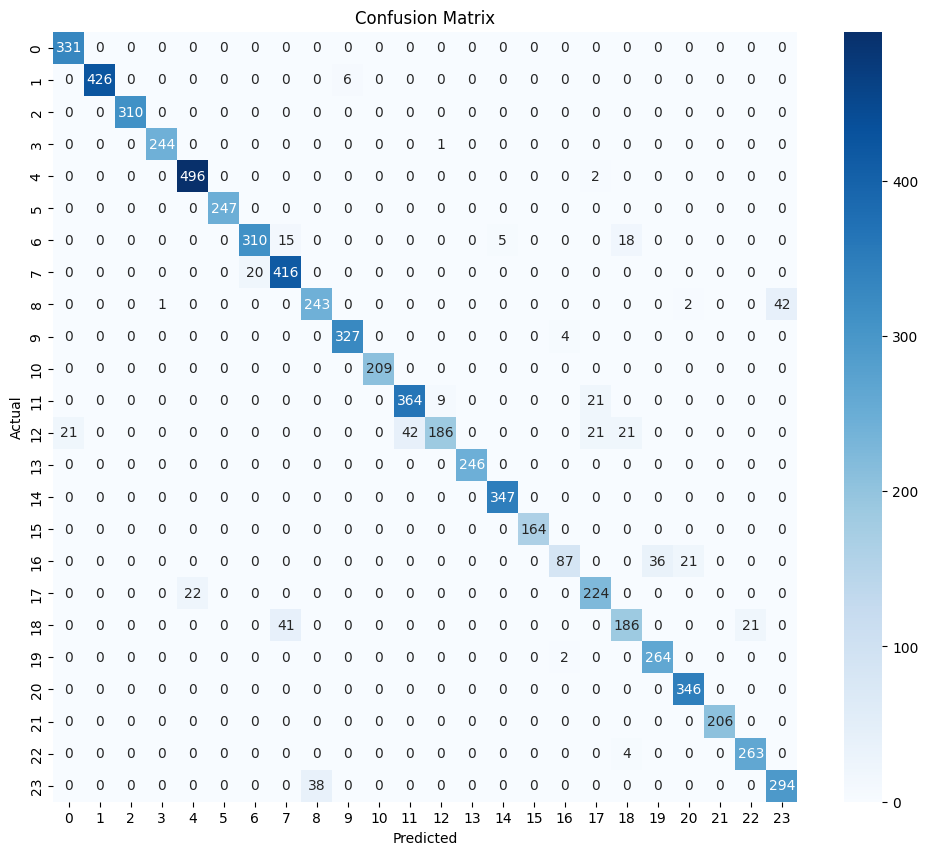

In [ ]:
#This section evaluates model performance on the test set using metrics like accuracy and loss to verify generalization.

val_loss, val_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {val_acc * 100:.2f}%")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


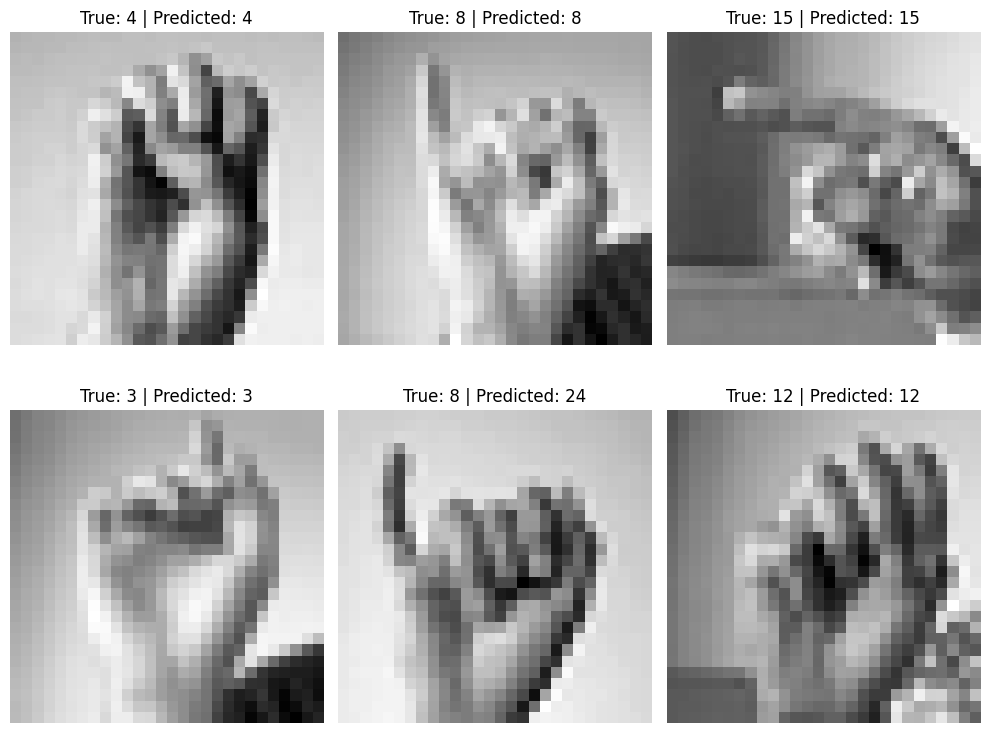

In [ ]:

# Visualize a few predictions on test images
# Here, we use the trained model to make predictions and display results, optionally showing sample images with their predicted labels.

plt.figure(figsize=(10, 8))
for i in range(6):
    index = np.random.randint(0, len(X_test))
    image = X_test[index].reshape(28, 28)
    true_label = np.argmax(y_test[index])
    predicted_label = y_pred_classes[index]

    plt.subplot(2, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label} | Predicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [8]:
# Links to Data set

https://drive.google.com/file/d/106eJ6r1JyfzmxgJELY8IvLLmy_eQHXre/view?usp=sharing
https://drive.google.com/file/d/1oj8aeUnmLX8AezVsoeJU9ix50h5gLIz_/view?usp=sharing

##  Summary
This notebook demonstrated how a Convolutional Neural Network (CNN) can effectively classify American Sign Language (ASL) letters using image data. CNNs are especially suited for spatial data like images due to their ability to detect features using convolutional filters.

**Gotchas:**
- CNNs need a lot of data to generalize well.
- Overfitting can occur quickly on small datasets .
- Preprocessing is critical: images must be normalized and reshaped properly.

